# Infering a Gaussian Mixture

## Import modules

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn import mixture

## Load data

In [2]:
npzfile = np.load('GaussianMixture.npz')
print(sorted(npzfile.files))

['mixing_idx', 'x_sample', 'y_sample']


## Plot data
The information which component generated which sample is deliberately not plotted.

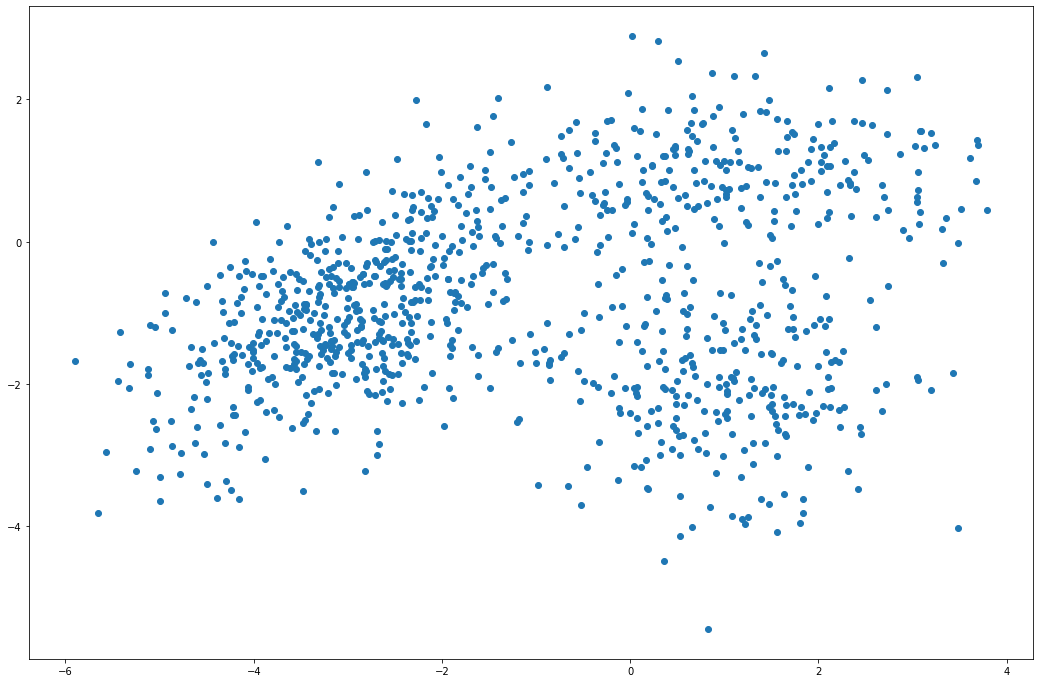

In [3]:
x_sample = npzfile['x_sample']
y_sample = npzfile['y_sample']
fig = plt.figure(figsize=(18,12))
plt.scatter(x_sample, y_sample)
plt.show()

## Gaussian Mixture Model
The data was generated mixing three normal distributions, 
\begin{equation}
\mathcal{N}\left( \left( 1 \atop 1 \right), \left( 2 \atop 0 \right. \left. 0 \atop 0.5 \right) \right), \mathcal{N}\left( \left( {-3} \atop {-1} \right), \left( 1 \atop 0.5 \right. \left. 0.5 \atop 1 \right) \right), \mathcal{N}\left( \left( 1 \atop {-2} \right), \left( 1 \atop 0 \right. \left. 0 \atop 1 \right) \right).
\end{equation}
with mixing coefficients 0.25, 0.5 and 0.25. 

### 3 Components

Setting the number of components to 3, the Gaussian mixture model returns as estimates.

In [4]:
n_components = 3
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
data = np.stack((x_sample, y_sample)).T
gmm.fit(data)
print('Mixing coefficients: ', gmm.weights_, '\n')
for idx in range(0, n_components):
    print('Component', idx+1)
    print('Mean:', gmm.means_[idx])
    print('Covariance:', gmm.covariances_[idx], '\n')

Mixing coefficients:  [0.25114602 0.24239799 0.50645599] 

Component 1
Mean: [ 0.90150352 -2.03229309]
Covariance: [[ 0.95102942 -0.05150548]
 [-0.05150548  0.8765206 ]] 

Component 2
Mean: [0.99530616 0.96079028]
Covariance: [[1.75131663 0.01247519]
 [0.01247519 0.44766598]] 

Component 3
Mean: [-3.02024232 -1.02218895]
Covariance: [[1.01545043 0.52429323]
 [0.52429323 0.94071939]] 



We can plot the data giving each sample a colour mixed from red, green and blue according to the posterior probabilities, also known as responsibilities.

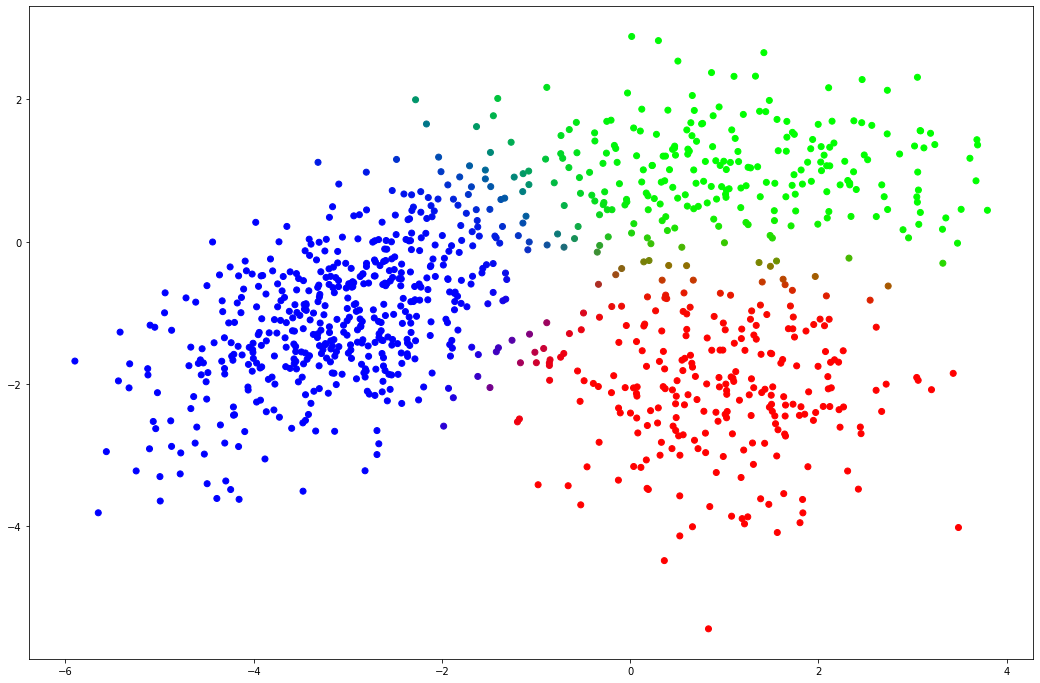

In [5]:
mixing_prob = gmm.predict_proba(data)
fig = plt.figure(figsize=(18,12))
plt.scatter(x_sample, y_sample, c = mixing_prob)
plt.show()

### 2 Components

Setting the number of components to 2, the Gaussian mixture model returns as estimates.

In [6]:
n_components = 2
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
data = np.stack((x_sample, y_sample)).T
gmm.fit(data)
print('Mixing coefficients: ', gmm.weights_, '\n')
for idx in range(0, n_components):
    print('Component', idx+1)
    print('Mean:', gmm.means_[idx])
    print('Covariance:', gmm.covariances_[idx], '\n')

Mixing coefficients:  [0.52126277 0.47873723] 

Component 1
Mean: [-2.96589528 -0.95057863]
Covariance: [[1.10391392 0.63770092]
 [0.63770092 1.05882542]] 

Component 2
Mean: [ 1.01111878 -0.62602435]
Covariance: [[1.23559423 0.19190142]
 [0.19190142 2.89250832]] 



We can plot the data giving each sample a colour mixed from red and green according to the posterior probabilities, also known as responsibilities.

(1000, 2)


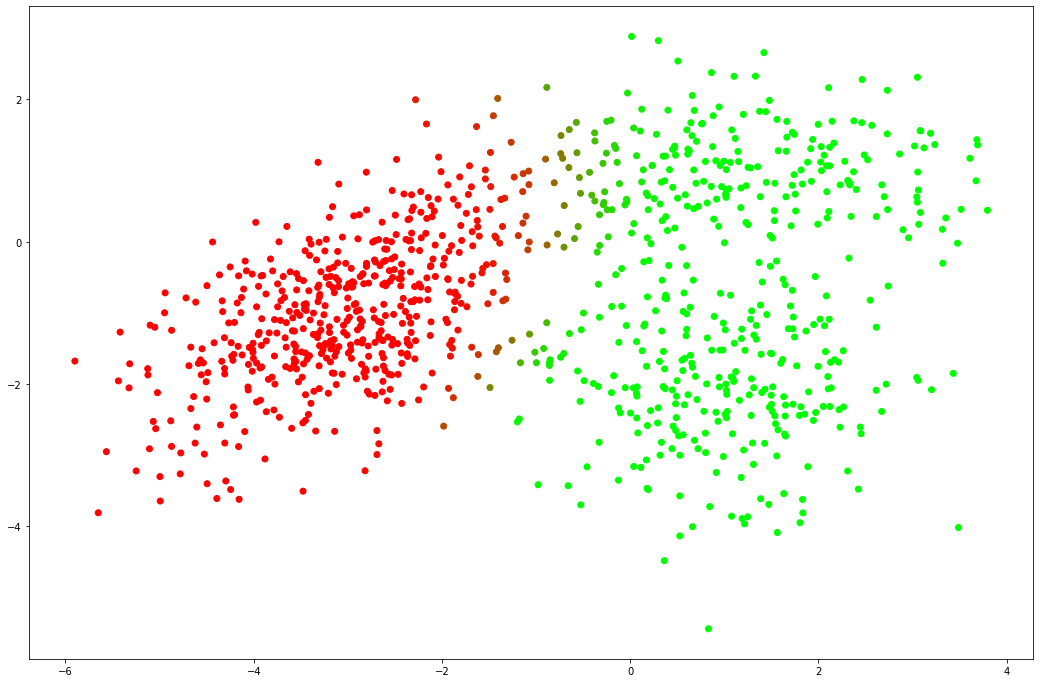

In [8]:
mixing_prob = gmm.predict_proba(data)
print(mixing_prob.shape)
c = np.concatenate((mixing_prob, np.zeros((mixing_prob.shape[0],1))),1 )
fig = plt.figure(figsize=(18,12))
plt.scatter(x_sample, y_sample, c = c)
plt.show()